In [1]:
import torch
from data import ClimateDataset
from models import ClassificationModel
from engine import Engine

In [2]:
model_checkpoint='bert-base-uncased'

In [3]:
results = {'acc':[],
           'f1':[],
           'lr':[]}

In [4]:
learning_rates = [1.0e-4, 5.0e-5, 1.0e-5]
for lr in learning_rates:
    print(f'Grid search {model_checkpoint}, learning rate {lr}')
    data = ClimateDataset(model_to_train=3,model_checkpoint=model_checkpoint,batch_size=32)
    data.setup_dataloaders()
    model = ClassificationModel(model_checkpoint=data.model_checkpoint,num_labels=data.num_labels)
    trainer = Engine(epochs=20,labels=data.labels)
    trainer.model = model.model
    trainer.device = model.device
    acc, f1 = trainer.run(lr=lr,wd=0.0,train_dataloader=data.train_dataloader,eval_dataloader=data.eval_dataloader,test_dataloader=data.test_dataloader, early_stop=3)
    results['acc'].append(acc)
    results['f1'].append(f1)
    results['lr'].append(lr)
    print('### '*10)
    print(results)
    print('### '*10)
    with torch.no_grad():
        torch.cuda.empty_cache()
    del data, model, trainer, acc, f1

Grid search bert-base-uncased, learning rate 0.0001


Filter:   0%|          | 0/1796 [00:00<?, ? examples/s]

Filter:   0%|          | 0/256 [00:00<?, ? examples/s]

Filter:   0%|          | 0/457 [00:00<?, ? examples/s]

Map:   0%|          | 0/1324 [00:00<?, ? examples/s]

Map:   0%|          | 0/189 [00:00<?, ? examples/s]

Map:   0%|          | 0/338 [00:00<?, ? examples/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
You're using a BertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


1 / 20: Train Loss:	1.5564	Val Loss:	1.2422	Accuracy:	0.5621	F1:	0.4126
2 / 20: Train Loss:	0.8211	Val Loss:	0.9866	Accuracy:	0.6657	F1:	0.5967
3 / 20: Train Loss:	0.3980	Val Loss:	0.9434	Accuracy:	0.7071	F1:	0.6279
4 / 20: Train Loss:	0.1684	Val Loss:	1.2273	Accuracy:	0.6302	F1:	0.6259
5 / 20: Train Loss:	0.1206	Val Loss:	1.1581	Accuracy:	0.7071	F1:	0.6693
6 / 20: Train Loss:	0.0642	Val Loss:	1.2235	Accuracy:	0.7041	F1:	0.6691
7 / 20: Train Loss:	0.0280	Val Loss:	1.3745	Accuracy:	0.6864	F1:	0.6604
8 / 20: Train Loss:	0.0438	Val Loss:	1.1567	Accuracy:	0.7337	F1:	0.6901
9 / 20: Train Loss:	0.0626	Val Loss:	1.3768	Accuracy:	0.7130	F1:	0.6638
10 / 20: Train Loss:	0.1038	Val Loss:	1.2909	Accuracy:	0.6686	F1:	0.6469
11 / 20: Train Loss:	0.1102	Val Loss:	1.3481	Accuracy:	0.7041	F1:	0.6640
No improvement for 3 epochs. Stopping early.
best (higgest macro f1-score) val results:
                         precision    recall  f1-score   support

             ad hominem       0.63      0.85      0.

Map:   0%|          | 0/189 [00:00<?, ? examples/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
You're using a BertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


1 / 20: Train Loss:	1.7426	Val Loss:	1.3530	Accuracy:	0.5947	F1:	0.4189
2 / 20: Train Loss:	1.0412	Val Loss:	1.0433	Accuracy:	0.6982	F1:	0.6189
3 / 20: Train Loss:	0.5305	Val Loss:	0.8617	Accuracy:	0.7426	F1:	0.7010
4 / 20: Train Loss:	0.2965	Val Loss:	0.9087	Accuracy:	0.7278	F1:	0.6761
5 / 20: Train Loss:	0.1680	Val Loss:	0.8925	Accuracy:	0.7515	F1:	0.7092
6 / 20: Train Loss:	0.0802	Val Loss:	1.0028	Accuracy:	0.6953	F1:	0.6521
7 / 20: Train Loss:	0.0435	Val Loss:	0.9973	Accuracy:	0.7396	F1:	0.6893
8 / 20: Train Loss:	0.0375	Val Loss:	1.0619	Accuracy:	0.7426	F1:	0.6973
No improvement for 3 epochs. Stopping early.
best (higgest macro f1-score) val results:
                         precision    recall  f1-score   support

             ad hominem       0.76      0.81      0.78        67
               anecdote       0.89      0.79      0.84        43
         cherry picking       0.60      0.86      0.71        56
      conspiracy theory       0.85      0.85      0.85        39
          

Map:   0%|          | 0/338 [00:00<?, ? examples/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
You're using a BertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


1 / 20: Train Loss:	2.0418	Val Loss:	1.8658	Accuracy:	0.3787	F1:	0.2013
2 / 20: Train Loss:	1.7028	Val Loss:	1.5788	Accuracy:	0.5266	F1:	0.3360
3 / 20: Train Loss:	1.4042	Val Loss:	1.3754	Accuracy:	0.5858	F1:	0.4043
4 / 20: Train Loss:	1.1530	Val Loss:	1.2350	Accuracy:	0.6420	F1:	0.4548
5 / 20: Train Loss:	0.9575	Val Loss:	1.1230	Accuracy:	0.6420	F1:	0.4729
6 / 20: Train Loss:	0.7730	Val Loss:	1.0313	Accuracy:	0.6538	F1:	0.4962
7 / 20: Train Loss:	0.6095	Val Loss:	0.9858	Accuracy:	0.6893	F1:	0.5956
8 / 20: Train Loss:	0.4919	Val Loss:	0.9740	Accuracy:	0.7101	F1:	0.6370
9 / 20: Train Loss:	0.3839	Val Loss:	0.9490	Accuracy:	0.6923	F1:	0.6384
10 / 20: Train Loss:	0.3080	Val Loss:	0.9654	Accuracy:	0.6953	F1:	0.6319
11 / 20: Train Loss:	0.2456	Val Loss:	0.9723	Accuracy:	0.6953	F1:	0.6605
12 / 20: Train Loss:	0.1939	Val Loss:	0.9852	Accuracy:	0.7071	F1:	0.6673
13 / 20: Train Loss:	0.1609	Val Loss:	1.0235	Accuracy:	0.6805	F1:	0.6364
14 / 20: Train Loss:	0.1462	Val Loss:	1.0936	Accuracy:	0.689

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

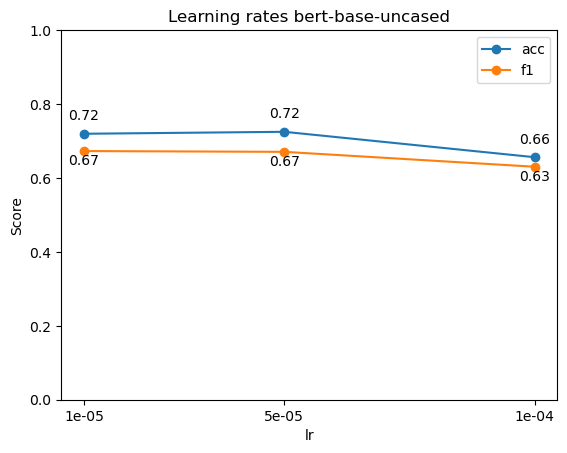

In [7]:
def plot_grid_search(df, title):

    # Create the plot
    ax = df.plot(x='lr', y=['acc', 'f1'], marker='o', linestyle='-')

    # Set y-axis range between 0 and 1
    plt.ylim(0, 1)

    # Annotate points with F1 scores
    for i, row in df.iterrows(): 
        ax.annotate(f'{row["f1"]:.2f}', (row["lr"], row["f1"]), textcoords='offset points', xytext=(0, -10), ha='center')

    # Annotate points with Acc scores
    for i, row in df.iterrows():
        ax.annotate(f'{row["acc"]:.2f}', (row["lr"], row["acc"]), textcoords='offset points', xytext=(0, 10), ha='center')
    
    # 
    plt.xticks(df['lr'], [f'{val:.0e}' for val in df['lr']], ha='center')
    # plt.xscale('log')
    plt.minorticks_off()

    plt.title(title)
    plt.xlabel('lr')
    plt.ylabel('Score')
    plt.show()

plot_grid_search(pd.DataFrame(results), f'Learning rates {model_checkpoint}')